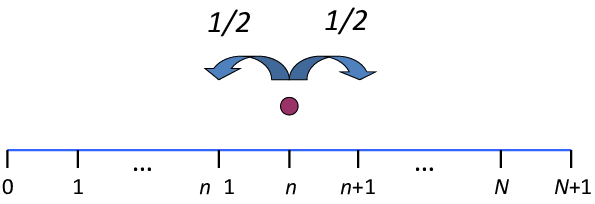

# Random Walk


As a physics student sometimes you see some random movement in nature like brownian motion(it's actually deterministic). we can use stochastic litrature to study brownian motion and find lots of valuable information about this process. Random walk is somehow one of the most instructive models that can help you understand how random process can model the nature.

for the beging let's see what random walk is. according to Wikipedia(https://en.wikipedia.org/wiki/Random_walk) random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.

An elementary example of a random walk is the random walk on the integer number line, ${\displaystyle \mathbb {Z} }$ , which starts at 0 and at each step moves +1 or −1 with equal probability. Other examples include the path traced by a molecule as it travels in a liquid or a gas (see Brownian motion), the search path of a foraging animal, the price of a fluctuating stock and the financial status of a gambler: all can be approximated by random walk models, even though they may not be truly random in reality.

We know that you are passionate and want to explore all details of these process(joke :) ) but for the begining let's start with the simplest model, one dimensional random walk with same probability for right and left step.

1. the simplest model of random walk is a One-dimensional random walk, which starts at 0 and at each step moves +1 or −1 with equal probability. consider 10000_step 1d random walk. and use $10^5$ ensemble. in each ensemble begin from the origin(0) and record the endpoint at 10000th step. plot the PDF of these endpoints. also, calculate the first four moments of this PDF.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def random_walk(step,ensemble):
    data = []
    for i in range(ensemble):
        random = [2*np.random.randint(0,2,size = (step))-1]
        end_point = np.sum(random)
        data.append(end_point)
    return data
ranwalk = random_walk(10000,100000);

In [3]:
import numpy
from scipy.stats import kurtosis ,skew

#mean
print('The 1st moment is: ',numpy.mean(ranwalk))

#variance
print('The 2nd moment is:', numpy.var(ranwalk))

#skew
print('The 3rd moment is: {}'.format(skew(ranwalk)))

#kurtosis
print('The 4th moment is: {}'.format(kurtosis(ranwalk)))

The 1st moment is:  0.19752
The 2nd moment is: 10009.100665849599
The 3rd moment is: -0.014262505263424406
The 4th moment is: 0.012994545267833502


<IPython.core.display.Javascript object>


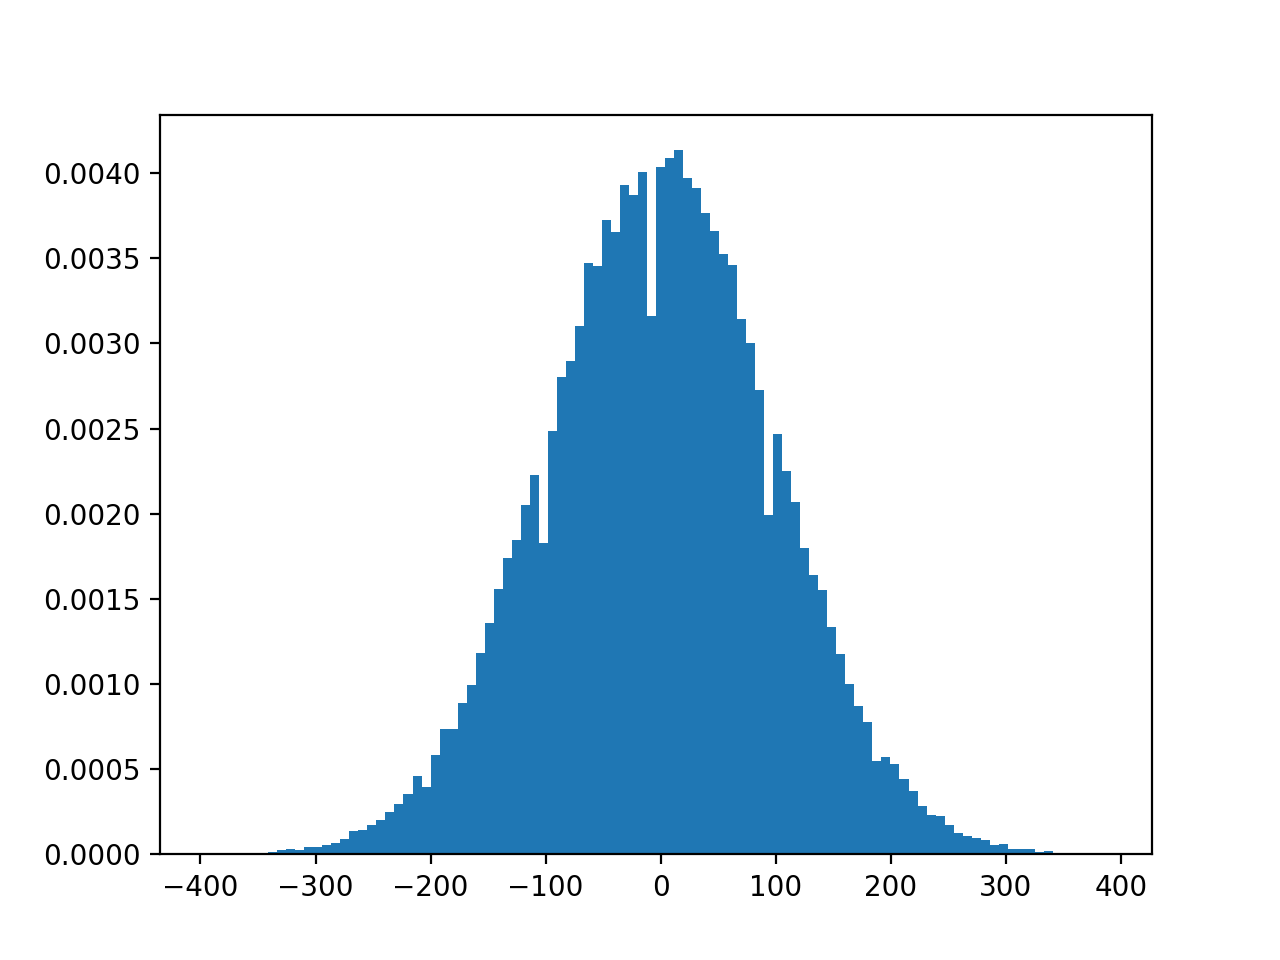

In [5]:
plt.hist(ranwalk, bins = 100, density = 1);

now look at the plot you create. does it looklike a normal distribution? if yes isn't it strange cause we know that the probability is bionomial not guassian.


***

The large number of used data make the plot like a gaussian which is a binomial under this condition.

***

2.change the probability of jumping to right and left in a way that $P_{left} = 2 P_{right}$ and then repeat the process of Q1 again and evaluate the PDF and first four moments and cumulants. 

<IPython.core.display.Javascript object>


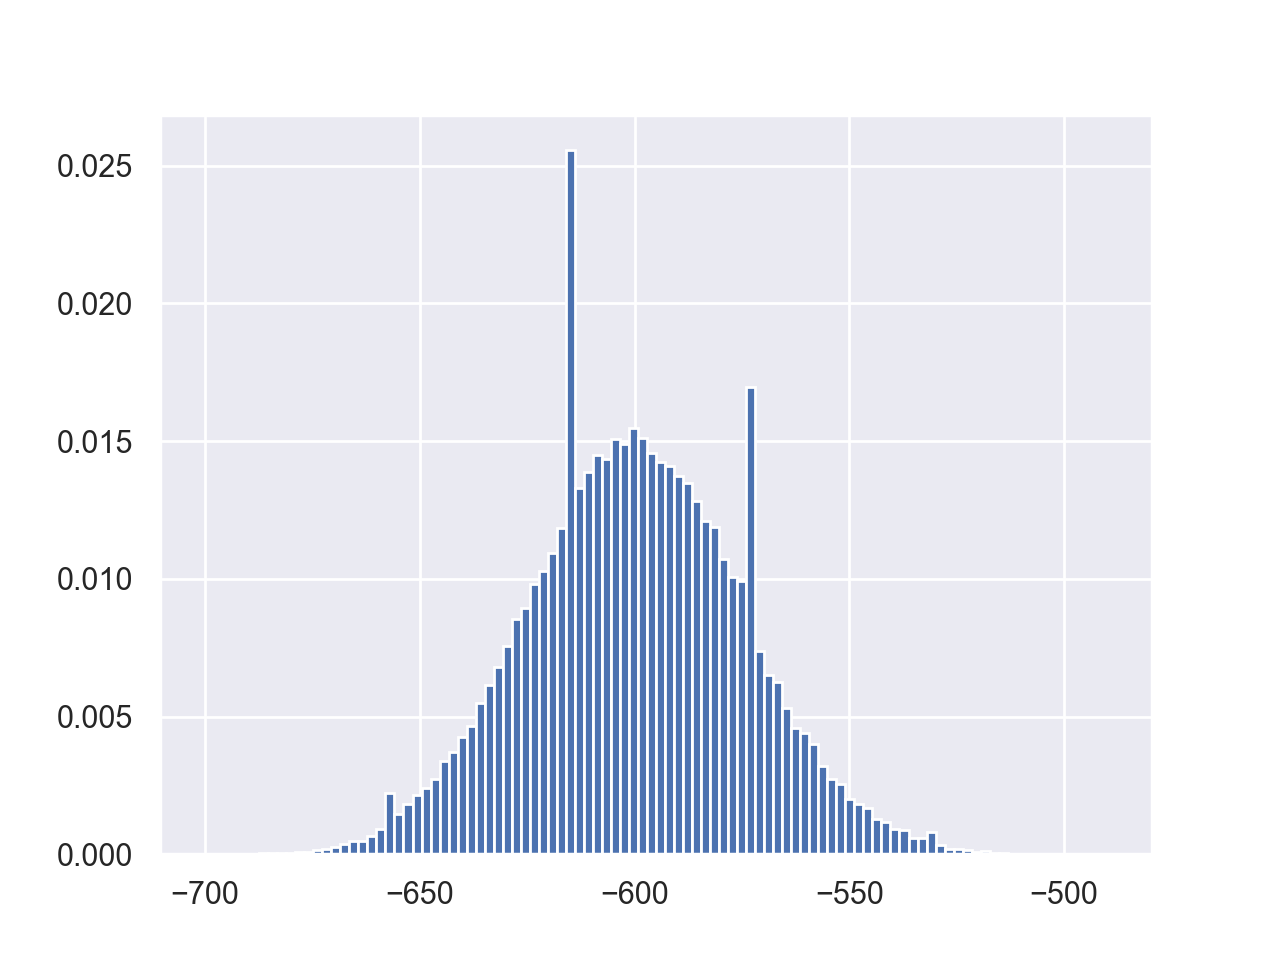

In [51]:
%matplotlib notebook
data = [sum(np.random.choice([-1,1], p=[.8,.2], size = 1000)) for i in range(100000)]
plt.hist(data, bins = 100, density = 1);

according to your result, can you tell how the shape of PDF function related to its cumulants?

***

According to the plot, unlike the last one, its mean is not around 0. Besides its standard deviation is asymmetric which was predictable since the data didn't have equal probability.

***

# Conditional Probability


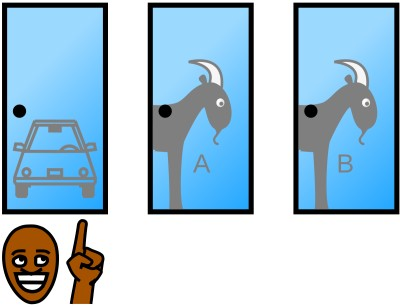

Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice? if Yes write a it's code to tell Us why and if your answer is No code it to prove the first group they are wrong:)

In [52]:
Tries = 100
chance = 0
for i in range(Tries):
    car = np.random.randint(3)
    choice = np.random.randint(3)
    if car != choice:
        chance += 1
print(chance / Tries)

0.68


***

There is a 68% chance to win if switch. Then it's better to!

***

# Centeral limit theorem

Choose a non-Gaussian distribution (uniform/bionomial/poission) and generate $10^5$ random variables for each of them.                                                      
a) plot the PDF of samples you created .                                                   
b) create $10^4$ random subset of length {2 , 5 , 10 , 20 , 100} from the first non-Gaussian distribution and caclculate mean of each subset, then plot the PDF of these means.                                                                       
c) what do you understand form comparing the original distribution with those five?


## a)

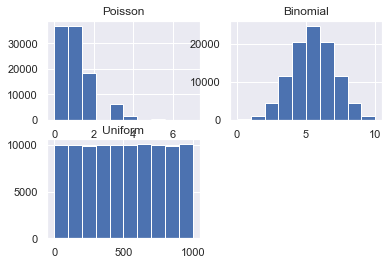

In [45]:

import numpy as np
import matplotlib.pyplot as plt

poisson = np.random.poisson(1, 100000)
binomial = np.random.binomial(10, .5 , 100000)
uniform = np.random.uniform(0,1000, 100000)

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)


_ = ax1.hist(poisson, bins = 10)
ax1.set_title('Poisson')
_ = ax2.hist(binomial, bins = 10)
ax2.set_title('Binomial')
_ = ax3.hist(uniform, bins = 10)
ax3.set_title('Uniform');

##### I also want to use Seaborn library for it's miniaml 🙃 , last one turned out ugly 🙈 

Text(0.5, 1.0, 'Poisson dist.')

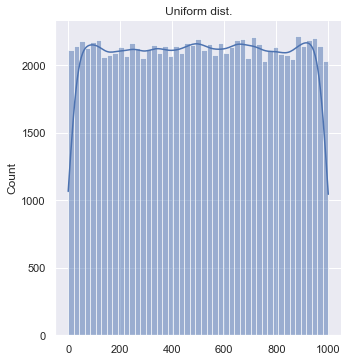

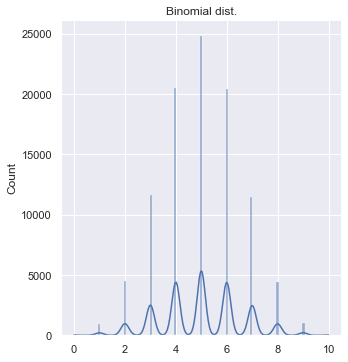

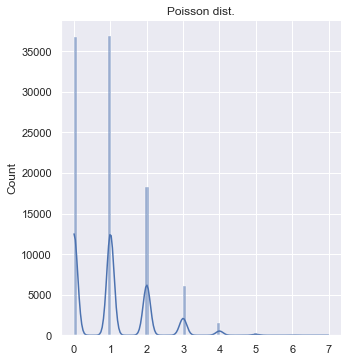

In [49]:
import numpy as np
import seaborn as sns
sns.set_theme()

x = np.linspace(0,100,1000)
sns.displot(uniform, kde = True)
plt.title('Uniform dist.')

sns.displot(binomial, kde = True)
plt.title('Binomial dist.')

sns.displot(poisson, kde = True)
plt.title('Poisson dist.')



## b)

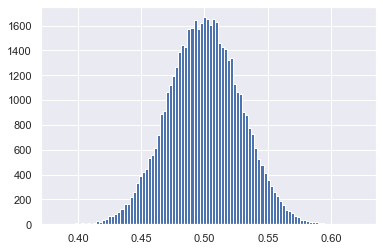

In [47]:
sets = [2, 5, 10, 20, 100]
sub_set = []
for i in sets:
    for j in range(10000):
        sub_set.append(np.random.rand(100))
mean = []
for s in sub_set:
    mean.append(s.mean())
plt.hist(mean, bins = 100);

# Poission Approximation

Use python libraries to generate bionomial and poission distributions for different N’s (remember $\lambda =NP$). Over plot them for N = {5, 10, 20, 50, 100, 200, 1000}
How does it behave as N increases? 



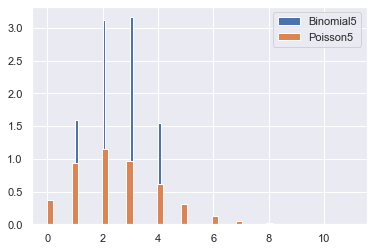

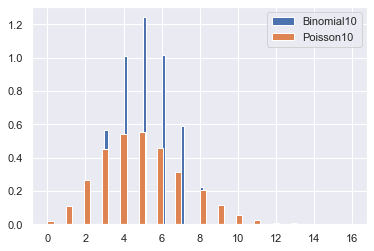

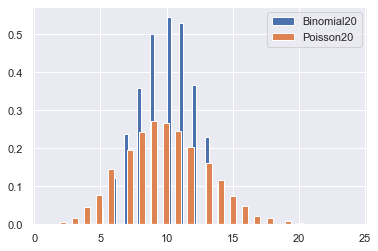

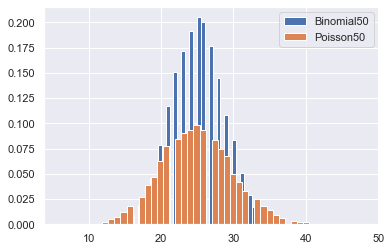

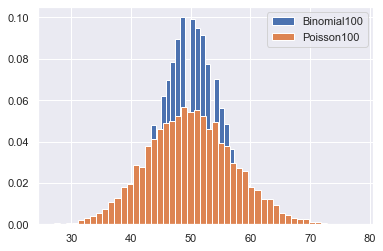

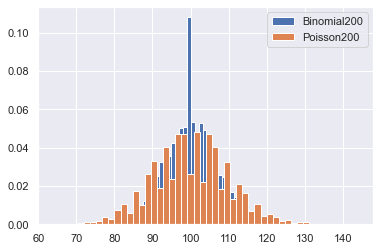

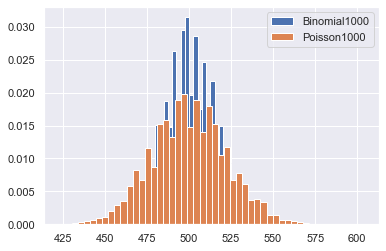

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in (5, 10, 20, 50, 100, 200, 1000):
    binomial = np.random.binomial(i, .5, 10000)
    poisson = np.random.poisson(i*0.5, 10000)
    fig = plt.figure(i)
    plt.hist(binomial, bins = 50, label =  'Binomial ' + str( i), density=1)
    plt.hist(poisson, bins = 50, label =  'Poisson' + str( i) , density=1)
    plt.legend()

plt.show()

# Box Muller Method

1- generate Normal distribution from uniform distribution (Box-Muller algorithm(https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform)- do not need to derive and prove it. the topic will be included in lectures in the following week). Normal= zero mean, unit variance    
a)Sample many points from this distribution. plot the pdf of the sample (plot hist).             
                              


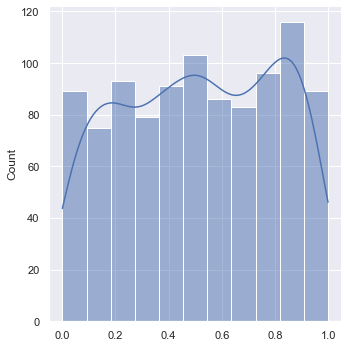

In [4]:
import numpy as np
import seaborn as sns
sns.set_theme()

dist = np.random.uniform(0,1,1000)
sns.displot(dist, kde = True)

b)Calculate mean of the sample. Its variance.

In [15]:
import pandas as pd
mean = np.mean(dist)
var = np.var(dist)
#data = pd.DataFrame([mean, var], columns = ['Mean','Varaiance'])
print('The mean is:',mean, 'and The varaince is:', var)

The mean is: 0.5140567607896914 and The varaince is: 0.08313461595730952


c)Overplot the pdf now, using this mean and variance (on the plot hist). Also use the mean and std deviation functions from python library. Do they agree?

In [13]:
#code here

d)Now that you have your Normal distribution, how can you turn it into a Gaussian distribution with  given mean and variance? For example mean=2, and std dev=4 ?   

In [ ]:
#code here

there are two problems left, but you can choose one of them to solve.(we highly recommend you to solve both of them)

# Nice Matrix

A matrix of size n$\times$n which include numbers of {1,2,3,...,$n^2$} is called nice, if sum of all rows and columns  are the same. write a code that get n as a input and return a n$\times$n Nice Matrix. print out the examples of Nice Matrix for n = 4,5,6

In [ ]:
#code here

# Honest and Liers

Suppose there 16 People sit around a circular table.  ٍEach claims that the two people next to him/her are liars. How many liars are there in the crowd? 

In [ ]:
#code here 